In [1]:
# Goal: determine the rule given a higher level descriptions of images in the grid
# Then use this rule to predict the next image in the sequence

# Attributes: Number, Position, Type, Size, Color


In [2]:
%pip install -r requirements.txt
%reload_ext autoreload

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-k4zss2jf
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-k4zss2jf
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import argparse
import json
import numpy as np
import random
from tqdm import tqdm
import xml.etree.ElementTree as ET
import zipfile
from matplotlib import pyplot as plt

In [20]:

def to_list(s):
    s = s.replace("[", "")
    s = s.replace("]", "")
    s = s.split(",")
    return [float(n) for n in s]


def switch(arr, i, j):
    tmp = arr[i]
    arr[i] = arr[j]
    arr[j] = tmp
    return arr


def get_sample(file_name, target):
    tree = ET.parse(file_name)
    root = tree.getroot()
    rpm = []
    rules = []
    for child in root:
        if child.tag == "Panels":
            for panel in child:
                comps = []
                for struct in panel:
                    for comp in struct:
                        comp_dict = {}
                        for layout in comp:
                            if "Distribute" in layout.attrib["name"]:
                                comp_dict["positions"] = []
                                comp_dict["entities"] = []
                            for entity in layout:
                                ent_dict = {}
                                ent_dict["Type"] = entity.attrib["Type"]
                                ent_dict["Size"] = entity.attrib["Size"]
                                ent_dict["Color"] = entity.attrib["Color"]
                                ent_dict["Angle"] = entity.attrib["Angle"]
                                if "Distribute" in layout.attrib["name"]:
                                    pos = to_list(entity.attrib["bbox"])
                                    comp_dict["positions"].append(pos)
                                    comp_dict["entities"].append(ent_dict)
                                else:
                                    comp_dict = ent_dict
                        comps.append(comp_dict)
                rpm.append(comps)
        if child.tag == "Rules":
            for rule_group in child:
                comp_rules = {}
                for rule in rule_group:
                    attr = rule.attrib["attr"]
                    name = rule.attrib["name"]
                    comp_rules[attr] = name
                rules.append(comp_rules)
    rpm = switch(rpm, 8, 8+target)
    return {"rules":rules, "rpm":rpm}

raven_path = "/nfs/turbo/coe-chaijy-unreplicated/datasets/RAVEN-10000"
folders = ["center_single", "distribute_nine", "in_distribute_four_out_center_single", "up_center_single_down_center_single",
           "distribute_four", "in_center_single_out_center_single", "left_center_single_right_center_single"]
sample_raven_image = "center_single/RAVEN_39_test"
sample_raven_image = folders[1] + "/RAVEN_39_test"
npz_fn = f"{raven_path}/{sample_raven_image}.npz"
target = np.load(npz_fn)["target"]
xml_fn = f"{raven_path}/{sample_raven_image}.xml"
sample = get_sample(xml_fn, target)
print(sample)
sample

{'rules': [{'Number': 'Progression', 'Type': 'Constant', 'Size': 'Arithmetic', 'Color': 'Distribute_Three'}], 'rpm': [[{'positions': [[0.16, 0.5, 0.33, 0.33], [0.83, 0.83, 0.33, 0.33], [0.16, 0.16, 0.33, 0.33], [0.5, 0.5, 0.33, 0.33], [0.5, 0.83, 0.33, 0.33], [0.83, 0.16, 0.33, 0.33], [0.83, 0.5, 0.33, 0.33]], 'entities': [{'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '3'}, {'Type': '2', 'Size': '3', 'Color': '2', 'Angle': '2'}, {'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '0'}, {'Type': '2', 'Size': '3', 'Color': '2', 'Angle': '0'}, {'Type': '4', 'Size': '3', 'Color': '2', 'Angle': '2'}, {'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '6'}, {'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '1'}]}], [{'positions': [[0.5, 0.16, 0.33, 0.33], [0.5, 0.83, 0.33, 0.33], [0.83, 0.83, 0.33, 0.33], [0.16, 0.83, 0.33, 0.33], [0.83, 0.5, 0.33, 0.33]], 'entities': [{'Type': '3', 'Size': '0', 'Color': '5', 'Angle': '5'}, {'Type': '4', 'Size': '0', 'Color': '5', 'Angle': '3'}, {'Type': '4

{'rules': [{'Number': 'Progression',
   'Type': 'Constant',
   'Size': 'Arithmetic',
   'Color': 'Distribute_Three'}],
 'rpm': [[{'positions': [[0.16, 0.5, 0.33, 0.33],
     [0.83, 0.83, 0.33, 0.33],
     [0.16, 0.16, 0.33, 0.33],
     [0.5, 0.5, 0.33, 0.33],
     [0.5, 0.83, 0.33, 0.33],
     [0.83, 0.16, 0.33, 0.33],
     [0.83, 0.5, 0.33, 0.33]],
    'entities': [{'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '3'},
     {'Type': '2', 'Size': '3', 'Color': '2', 'Angle': '2'},
     {'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '0'},
     {'Type': '2', 'Size': '3', 'Color': '2', 'Angle': '0'},
     {'Type': '4', 'Size': '3', 'Color': '2', 'Angle': '2'},
     {'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '6'},
     {'Type': '3', 'Size': '3', 'Color': '2', 'Angle': '1'}]}],
  [{'positions': [[0.5, 0.16, 0.33, 0.33],
     [0.5, 0.83, 0.33, 0.33],
     [0.83, 0.83, 0.33, 0.33],
     [0.16, 0.83, 0.33, 0.33],
     [0.83, 0.5, 0.33, 0.33]],
    'entities': [{'Type': '3', 'Size': '

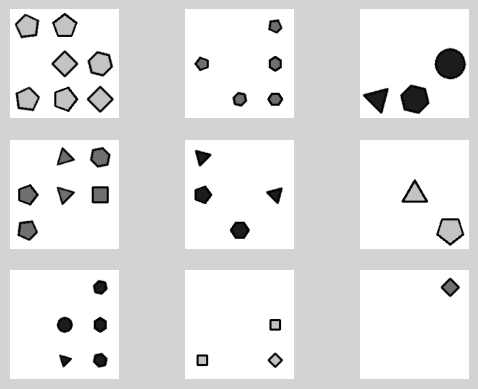

Correct answer: 1


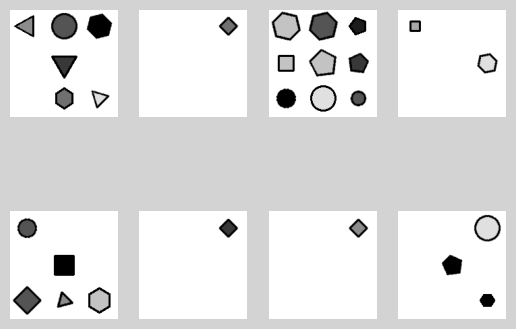

In [21]:
def display_problem(images, answer):
    # show the 3x3 grid of images
    first_eight = images[:9]
    fig, ax = plt.subplots(3, 3)
    for a in ax.ravel():
        a.set_aspect('equal')
    fig.set_facecolor('lightgray')
    for i in range(3):
        for j in range(3):
            if i == 2 and j == 2:
                ax[i, j].imshow(images[8 + answer], cmap='gray')
            else:
                ax[i, j].imshow(first_eight[i * 3 + j], cmap='gray')
            ax[i, j].axis('off')
    plt.show()
    print(f"Correct answer: {answer}")
    # Show the 8 possible answers
    fig, ax = plt.subplots(2, 4)
    for a in ax.ravel():
        a.set_aspect('equal')
    fig.set_facecolor('lightgray')
    for i in range(2):
        for j in range(4):
            ax[i, j].imshow(images[8 + i * 4 + j], cmap='gray')
            ax[i, j].axis('off')
    plt.show()
answer = np.load(npz_fn)['predict']
images = np.load(npz_fn)['image']
display_problem(images, answer)
# sample


0 16


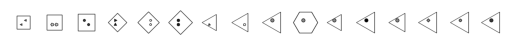

In [7]:
map_attribute_to_maps = {}
attributes = ['Type', 'Size', 'Color', 'Angle']
for attribute in attributes:
    map_attribute_to_maps[attribute] = {}

for i in range(16):
    for attribute in attributes:
        key = sample['rpm'][i][0][attribute]
        if key not in map_attribute_to_maps[attribute]:
            map_attribute_to_maps[attribute][key] = []
        map_attribute_to_maps[attribute][key].append(images[i])

pairs = list(map_attribute_to_maps['Color'].items())
pairs.sort()
for key, value in pairs:
    print(key, len(value))
    # plot multiple images on one figure
    fig, ax = plt.subplots(1, len(value))
    if len(value) == 1:
        ax = [ax]
    for i in range(len(value)):
        ax[i].imshow(value[i], cmap='gray')
        ax[i].axis('off')
    plt.show()